# Time Series Analyser

In [2]:
from ezs_func import *

In [3]:
random_state=42

## Examples of time series dataset

In [4]:
np.random.seed(0)
t = np.arange(1, 1000)
trend = 0.0001 * t ** 2 + 100
daily_seasonality = 5 * np.sin(2 * np.pi * t / 24)
noise = np.random.randn(len(t))
y = trend + daily_seasonality  + noise
index = pd.date_range(start='2000-01-01', periods=len(t), freq='H')
df_1s = pd.DataFrame(data=y, index=index, columns=['data'])
df_1s.index.name = 'date'
target = 'data'
df_1s.head()

,data
date,
2000-01-01 00:00:00,103.058248
2000-01-01 01:00:00,102.900557
2000-01-01 02:00:00,104.515172
2000-01-01 03:00:00,106.572620
2000-01-01 04:00:00,106.699687


In [6]:
df_1s.to_csv('./ts_1s.csv', index=True)


In [7]:
np.random.seed(0)
t = np.arange(1, 1000)
trend = 0.0001 * t ** 2 + 100
daily_seasonality = 5 * np.sin(2 * np.pi * t / 24)
weekly_seasonality = 10 * np.sin(2 * np.pi * t / (24 * 7))
noise = np.random.randn(len(t))
y = trend + daily_seasonality + weekly_seasonality + noise
index = pd.date_range(start='2000-01-01', periods=len(t), freq='H')
df_2s = pd.DataFrame(data=y, index=index, columns=['data'])
df_2s.index.name = 'date'
target = 'data'
df_2s.head()

,data
date,
2000-01-01 00:00:00,103.432160
2000-01-01 01:00:00,103.647858
2000-01-01 02:00:00,105.634817
2000-01-01 03:00:00,108.063043
2000-01-01 04:00:00,108.558803


In [ ]:
df_2s.to_csv('./ts_1s.csv', index=True)

In [3]:
df_sun = pd.read_csv("dataset/Sunspots.csv", index_col = 1, parse_dates = True)
df_sun.drop(columns = 'Unnamed: 0',inplace = True)
target = 'Total_Sunspot_Number'
df_sun.head()

,Total_Sunspot_Number
Date,
1749-01-31,96.7
1749-02-28,104.3
1749-03-31,116.7
1749-04-30,92.8
1749-05-31,141.7


In [4]:
df_gold = pd.read_csv("dataset/goldstock.csv", index_col = 1, parse_dates = True)
df_gold.drop(columns = 'Unnamed: 0',inplace = True)
target = 'Open'
# Force the frequency of the index
df_gold = df_gold.resample('D').first()
df_gold = df_gold.asfreq('D')
df_gold.head()

,Close,Volume,Open,High,Low
Date,,,,,
2014-01-22,1238.6,80262.0,1240.5,1243.5,1235.5
2014-01-23,1262.5,41697.0,1235.1,1267.1,1230.8
2014-01-24,1264.5,34998.0,1264.3,1273.2,1256.9
2014-01-25,NaN,NaN,NaN,NaN,NaN
2014-01-26,NaN,NaN,NaN,NaN,NaN


In [5]:
df = df_gold

## EDA
### Correlation & Autocorellation

Correlation matrix


,Close,Volume,Open,High,Low
Close,1.000000,0.023903,0.998997,0.999526,0.999575
Volume,0.023903,1.000000,0.028158,0.031968,0.019379
Open,0.998997,0.028158,1.000000,0.999458,0.999385
High,0.999526,0.031968,0.999458,1.000000,0.999249
Low,0.999575,0.019379,0.999385,0.999249,1.000000


Hierarchical clustering


ValueError: Distance matrix 'X' must be symmetric.

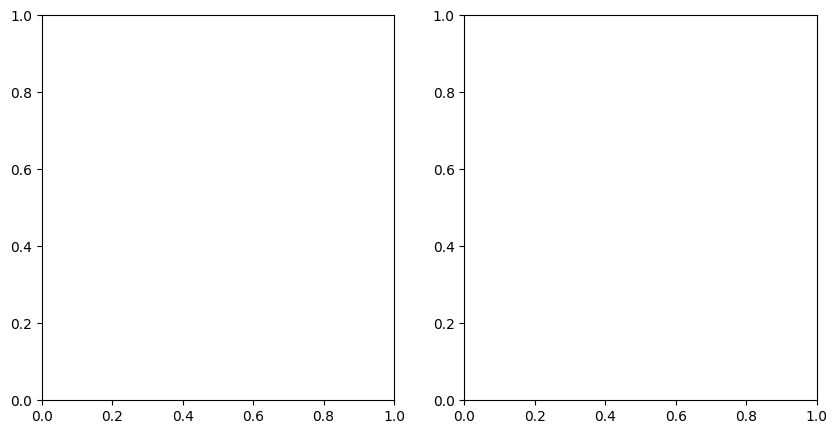

In [6]:
plot_correlation(df)

In [7]:
plot_acf_pacf(df, column=df.columns.to_list())

interactive(children=(Dropdown(description='column', options=('Close', 'Volume', 'Open', 'High', 'Low'), value…

### Seasonal decomposition
#### Seasonal decomposition with one period

In [8]:
plot_seasonal_decompose(df, column=df.columns.to_list(), model=['additive', 'multiplicative'], period=(1,int(df.shape[0]/4),1))

interactive(children=(Dropdown(description='column', options=('Close', 'Volume', 'Open', 'High', 'Low'), value…

#### Seasonal decomposition with one period

In [8]:
plot_seasonal_decompose_2(df, column=df.columns.to_list(), period1=(1,int(df.shape[0]/4),1), period2=(1,20,1))

interactive(children=(Dropdown(description='column', options=('Total_Sunspot_Number',), value='Total_Sunspot_N…

### Unobserved components decomposition

In [9]:
plot_unobserved_components(df, column=df.columns.to_list(), model=model_uc, method=method, confidence=(0.8,1,0.01))

interactive(children=(Dropdown(description='column', options=('Total_Sunspot_Number',), value='Total_Sunspot_N…

# Modelling
## Convert time series to supervised learning problem 

In [9]:
df_copy = df.copy()

The variable `n_in` fixes the window size (the number of past observations used to make prediction).

In [10]:
df_s, target, preds = ts_dataframe_to_supervised(df_copy, target=target, n_in=3, n_out=1, dropT=True)

In [11]:
target

'Open(t)'

## Quick EDA 

Correlation matrix


,Open(t),Close(t-3),Volume(t-3),Open(t-3),High(t-3),Low(t-3),Close(t-2),Volume(t-2),Open(t-2),High(t-2),Low(t-2),Close(t-1),Volume(t-1),Open(t-1),High(t-1),Low(t-1)
Open(t),1.000000,0.997871,0.060996,0.996923,0.997507,0.997446,0.998712,0.029510,0.997985,0.998420,0.998492,0.999763,0.014744,0.998909,0.999418,0.999515
Close(t-3),0.997871,1.000000,0.063884,0.999000,0.999555,0.999572,0.999001,0.035062,0.999854,0.999359,0.999295,0.998044,0.019629,0.998781,0.998332,0.998312
Volume(t-3),0.060996,0.063884,1.000000,0.070243,0.070891,0.059824,0.062810,0.425056,0.061190,0.061725,0.059763,0.060695,0.452693,0.062048,0.062166,0.060303
Open(t-3),0.996923,0.999000,0.070243,1.000000,0.999484,0.999326,0.997964,0.034449,0.998742,0.998278,0.998207,0.997042,0.018728,0.997741,0.997307,0.997321
High(t-3),0.997507,0.999555,0.070891,0.999484,1.000000,0.999230,0.998553,0.034789,0.999390,0.999056,0.998690,0.997623,0.019652,0.998323,0.998033,0.997779
Low(t-3),0.997446,0.999572,0.059824,0.999326,0.999230,1.000000,0.998510,0.034121,0.999401,0.998737,0.998942,0.997593,0.018006,0.998282,0.997700,0.998006
Close(t-2),0.998712,0.999001,0.062810,0.997964,0.998553,0.998510,1.000000,0.030970,0.999156,0.999552,0.999619,0.998881,0.018509,0.999781,0.999242,0.999221
Volume(t-2),0.029510,0.035062,0.425056,0.034449,0.034789,0.034121,0.030970,1.000000,0.035712,0.038995,0.027264,0.030308,0.486765,0.028352,0.029300,0.027665
Open(t-2),0.997985,0.999854,0.061190,0.998742,0.999390,0.999401,0.999156,0.035712,1.000000,0.999528,0.999450,0.998166,0.018279,0.998920,0.998462,0.998432
High(t-2),0.998420,0.999359,0.061725,0.998278,0.999056,0.998737,0.999552,0.038995,0.999528,1.000000,0.999308,0.998596,0.019544,0.999432,0.999066,0.998781


Hierarchical clustering


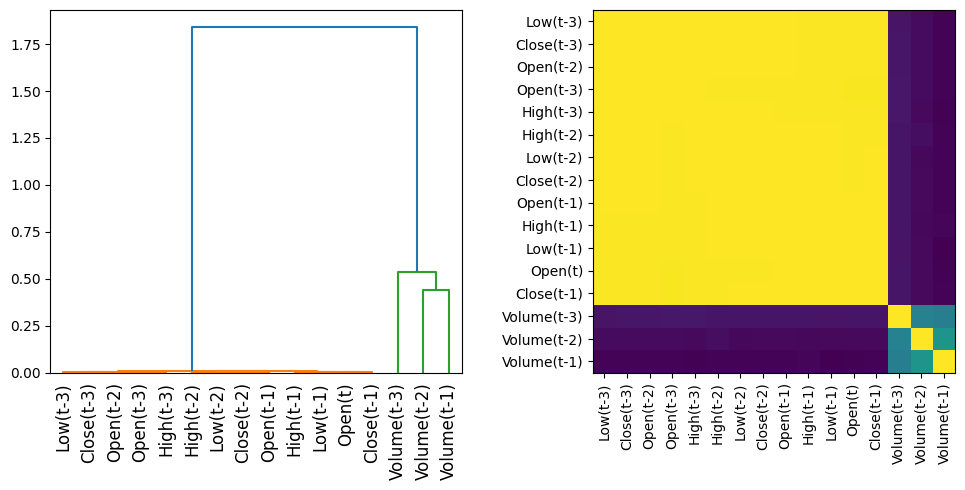

In [12]:
plot_correlation(df_s)

## Modelling using machine learning

In [49]:
y = df_s[target]

In [50]:
X = df_s.drop(target, axis=1)

In [51]:
from sklearn.svm import SVR
from sklearn.neural_network import MLPRegressor
from sklearn.ensemble import RandomForestRegressor, HistGradientBoostingRegressor, AdaBoostRegressor, BaggingRegressor, ExtraTreesRegressor, GradientBoostingRegressor
from sklearn.gaussian_process.kernels import RBF, WhiteKernel, ConstantKernel, Matern, RationalQuadratic, ExpSineSquared, DotProduct
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor

In [52]:
model_ml = [('AdaBoost', AdaBoostRegressor(n_estimators=100, random_state=random_state)), 
            ('HistGradientBoosting', HistGradientBoostingRegressor(early_stopping=True, random_state=random_state)), 
            ('RandomForest sq err', RandomForestRegressor(criterion='squared_error', max_depth=10, n_estimators=100, random_state = random_state, n_jobs=-1)),
            ('RandomForest abs err', RandomForestRegressor(criterion='absolute_error', max_depth=10, n_estimators=100, random_state = random_state, n_jobs=-1)),
            ('RandomForest Poisson', RandomForestRegressor(criterion='poisson', max_depth=10, n_estimators=100, random_state = random_state, n_jobs=-1)),
            ('Gradient boosting', GradientBoostingRegressor(n_estimators=100, learning_rate=1.0, max_depth=1, random_state=random_state)),
            ('Bagging', BaggingRegressor(n_estimators=100, random_state=random_state, n_jobs=-1)),
            ('Bagging MLP', BaggingRegressor(estimator=MLPRegressor(), n_estimators=100, random_state=random_state, n_jobs=-1)),
            ('Bagging SVR linear', BaggingRegressor(estimator=SVR(kernel='linear'), n_estimators=100, random_state=random_state, n_jobs=-1)),
            ('Bagging SVR poly', BaggingRegressor(estimator=SVR(kernel='poly'), n_estimators=100, random_state=random_state, n_jobs=-1)),
            ('Bagging SVR rbf', BaggingRegressor(estimator=SVR(kernel='rbf'), n_estimators=100, random_state=random_state, n_jobs=-1)),
            ('MLP relu', MLPRegressor(hidden_layer_sizes=(20, 20, ), activation='relu', solver='adam', early_stopping=True, random_state=random_state, max_iter=2000)), 
            ('MLP logistic', MLPRegressor(hidden_layer_sizes=(20, 20, ), activation='logistic', solver='adam', early_stopping=True, random_state=random_state, max_iter=2000)), 
            ('MLP tanh', MLPRegressor(hidden_layer_sizes=(20, 20, ), activation='tanh', solver='adam', early_stopping=True, random_state=random_state, max_iter=2000)),
            ('Gaussian process linear', GaussianProcessRegressor(kernel = ConstantKernel() * DotProduct() + ConstantKernel() + WhiteKernel(), random_state = random_state)),
            ('Gaussian process rbf', GaussianProcessRegressor(kernel = ConstantKernel() * RBF() + ConstantKernel() + WhiteKernel(), random_state = random_state)),
            ('Gaussian process expsinesq', GaussianProcessRegressor(kernel = ConstantKernel() * ExpSineSquared() + ConstantKernel() + WhiteKernel(), random_state = random_state)),
            ('Gaussian process ratquad', GaussianProcessRegressor(kernel = ConstantKernel() * RationalQuadratic() + ConstantKernel() + WhiteKernel(), random_state = random_state)),
            ('Decision tree sq err', DecisionTreeRegressor(criterion='friedman_mse', random_state = random_state)),
            ('Decision tree abs err', DecisionTreeRegressor(criterion='absolute_error', random_state = random_state)),
            ('Decision tree Poisson', DecisionTreeRegressor(criterion='poisson', random_state = random_state)),
            ('KNeighbors uniform', KNeighborsRegressor(weights='uniform')),
            ('KNeighbors distance', KNeighborsRegressor(weights='distance'))
           ]

In [53]:
model = plot_model_results(X, y, test_size=(0.1,0.5,0.01), model=model_ml, confidence=(0.8,1,0.01), plot_intervals=True, plot_anomalies=False)

interactive(children=(FloatSlider(value=0.30000000000000004, description='test_size', max=0.5, min=0.1, step=0…

In [28]:
print(model)

None
